In [331]:
#Dependencies
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np 
import seaborn as sns 
import requests as req
import random 

#Read CSVs and Combine to One Dataframe
file_one = "CSVs/rollingsales_bronx.csv"
file_two = "CSVs/rollingsales_brooklyn.csv"
file_three = "CSVs/rollingsales_manhattan.csv"
file_four = "CSVs/rollingsales_queens.csv"
file_five = "CSVs/rollingsales_statenisland.csv"

bronx_pd = pd.read_csv(file_one)
brooklyn_pd = pd.read_csv(file_two)
manhattan_pd = pd.read_csv(file_three)
queens_pd = pd.read_csv(file_four)
staten_island_pd = pd.read_csv(file_five)
sales_df = pd.concat([manhattan_pd, bronx_pd, brooklyn_pd, queens_pd, staten_island_pd])

#Clean missing rows, change Borough numbers to names and sort out residential buildings
sales_df['BOROUGH'] = sales_df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Island'})
sales_df['BUILDING CLASS'], sales_df['CATEGORY'] = sales_df['BUILDING CLASS CATEGORY'].str.split(' ', 1).str
del (sales_df['BUILDING CLASS CATEGORY'], sales_df['BLOCK'], sales_df['LOT'],  sales_df['EASE-MENT'],  sales_df['TAX CLASS AT PRESENT'],
     sales_df['TAX CLASS AT TIME OF SALE'])
sales_df = sales_df.replace('-', np.nan).dropna(thresh=7)
sales_df = sales_df[~sales_df['BUILDING CLASS'].isin(['11A'])]
sales_df[['BUILDING CLASS']] = sales_df[['BUILDING CLASS']].apply(pd.to_numeric)
sales_df[' SALE PRICE '] = pd.to_numeric(sales_df[' SALE PRICE ']) 
#Use Loop to sort out residential buildings

# Create a list to store the data
sale_type = []

# For each row in the column,
for row in sales_df['BUILDING CLASS']:
    if row < 4 :
        sale_type.append('Residential Sale')
    elif row == 6:
        sale_type.append('Residential Sale')
    elif row == 9:
        sale_type.append('Residential Sale')
    elif row == 10:
        sale_type.append('Residential Sale')
    elif row == 12:
        sale_type.append('Residential Sale')
    elif row == 13:
        sale_type.append('Residential Sale')
    elif row == 15:
        sale_type.append('Residential Sale')
    elif row == 16:
        sale_type.append('Residential Sale')
    elif row == 17:
        sale_type.append('Residential Sale')
    else:
        # Append Other
        sale_type.append('Other')
        
# Create a column from the list
sales_df['sale_type'] = sale_type

sales_df = sales_df[~sales_df['sale_type'].isin(['Other'])]

return sales_df


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING CLASS,CATEGORY,sale_type
0,Manhattan,INWOOD,A5,49 MARBLE HILL AVENUE,,10463,1.0,0,1,1219,1224,1920,A5,635000.0,8/18/17,1,ONE FAMILY DWELLINGS,Residential Sale
1,Manhattan,WASHINGTON HEIGHTS LOWER,A9,16 SYLVAN TERRACE,,10032,1.0,0,1,673,1425,1899,A9,1560000.0,9/28/17,1,ONE FAMILY DWELLINGS,Residential Sale
2,Manhattan,HARLEM-EAST,A5,104 EAST 101 STREET,,10029,1.0,0,1,1607,1466,1890,A5,NaN,3/31/17,1,ONE FAMILY DWELLINGS,Residential Sale
3,Manhattan,HARLEM-EAST,A5,104 EAST 101ST STREET,,10029,1.0,0,1,1607,1466,1890,A5,NaN,2/4/17,1,ONE FAMILY DWELLINGS,Residential Sale
4,Manhattan,HARLEM-EAST,A9,101B EAST 97TH STREET,,10029,1.0,0,1,847,1472,1925,A9,NaN,3/7/17,1,ONE FAMILY DWELLINGS,Residential Sale


In [116]:
#Create Price Bins and Dataframe for later
price_bins = [0, 250000, 500000, 750000, 1000000, 1500000, 2000000, 3000000, 4000000, 1000000000]

# Create the names for the bins
bin_names = ['$0-250K', '$250K-$500K', '$500K-$750K', '$750K-$1M', '$1M-$1.5M', '$1.5M-$2M',
              '$2M-$3M', '$3M-$4M', '4000000+']

sales_df["Price Category"] = pd.cut(sales_df[' SALE PRICE '], price_bins, labels=bin_names)


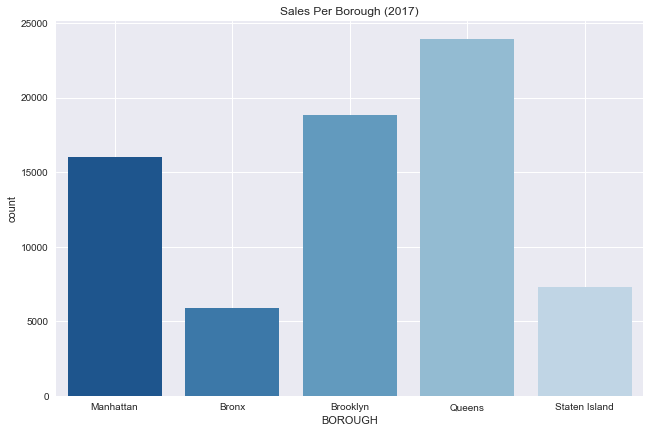

In [305]:
#Sales Per Borough

sns.set(style="dark")
colors = sns.color_palette("Blues_r")

# Draw a count plot to show the number of sales per borough
g = sns.factorplot(x="BOROUGH", data=sales_df, kind="count",
                   palette=colors, size=6, aspect=1.5, order=['1','2','13'])
g.set_xticklabels(step=1)
plt.grid(color="white") 
plt.title("Sales Per Borough (2017)")
plt.savefig("totalsales.png")


plt.show()

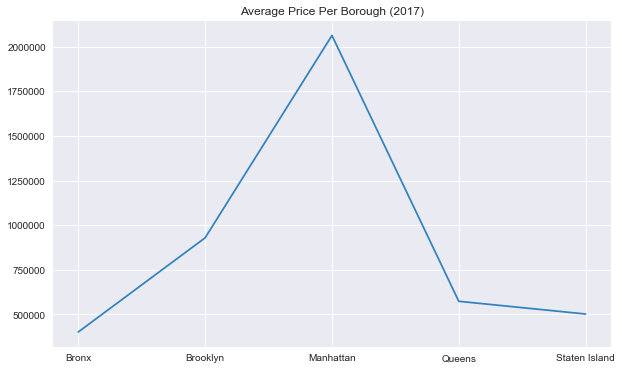

In [324]:
#Average Price Per Borough
sns.set_style("dark")

average_price = sales_df.groupby(["BOROUGH"])[" SALE PRICE "].mean()

avg_price_df = pd.DataFrame(average_price)
x = avg_price_df.index
y = average_price
plt.figure(figsize=(10,6))

plt.plot(x, y, color="#3182bd")
plt.title("Average Price Per Borough (2017)")

plt.grid(color="white") 
plt.savefig("avgprice.png")

plt.show()

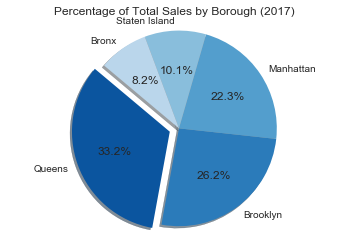

In [323]:
#Percentage of Total Sales by Borough
sns.set(style="white")
colors = sns.color_palette("Blues_r")

percentage_sales = sales_df["BOROUGH"].value_counts()
explode=[0.1,0,0,0,0]
labels = ["Queens", "Brooklyn", "Manhattan", "Staten Island", "Bronx"]

# Draw a count plot to show the number of planets discovered each year
plt.pie(percentage_sales, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=140, labels=labels)

plt.title("Percentage of Total Sales by Borough (2017)")

plt.axis("equal")
plt.savefig("percenttotalsales.png")

plt.show()

In [284]:
#Top Selling Neighborhoods
top_nh = sales_df["NEIGHBORHOOD"].value_counts()


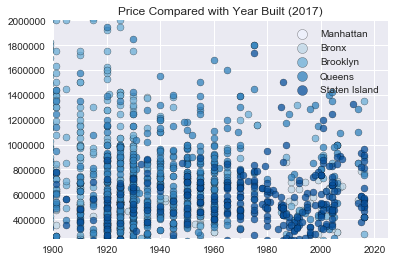

In [328]:
#Price Compared with Year Built(Sample Taken)
filtered_df = sales_df.replace('-', np.nan).dropna(how='any')
filtered_df = filtered_df.sample(n=1500, replace=True)
manhattan = filtered_df[filtered_df['BOROUGH'] == 'Manhattan']
brooklyn = filtered_df[filtered_df['BOROUGH'] == 'Brooklyn']
bronx = filtered_df[filtered_df['BOROUGH'] == 'Bronx']
staten = filtered_df[filtered_df['BOROUGH'] == 'Staten Island']
queens = filtered_df[filtered_df['BOROUGH'] == 'Queens']

#add grid
sns.set_style("dark")
plt.grid(color="white") 

plt.scatter(manhattan['YEAR BUILT'], manhattan[' SALE PRICE '], color="#eff3ff", s=20, edgecolor = 'black',
        label = 'Manhattan', alpha = .75)
plt.scatter(bronx['YEAR BUILT'], bronx[' SALE PRICE '], color="#bdd7e7", edgecolor = 'black',
        label = 'Bronx', alpha = .75)
plt.scatter(brooklyn['YEAR BUILT'], brooklyn[' SALE PRICE '], color="#6baed6", edgecolor = 'black',
        label = 'Brooklyn', alpha = .75)
plt.scatter(queens['YEAR BUILT'], queens[' SALE PRICE '], color="#3182bd", edgecolor = 'black',
        label = 'Queens', alpha = .75)
plt.scatter(staten['YEAR BUILT'], staten[' SALE PRICE '], color="#08519c", edgecolor = 'black',
        label = 'Staten Island', alpha = .75)

#change field size
plt.xlim(1900, 2025)
plt.ylim(250000,2000000)

#add legend
lgnd = plt.legend(loc='best')
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[2]._sizes = [100]
lgnd.legendHandles[3]._sizes = [100]
lgnd.legendHandles[4]._sizes = [100]

plt.title("Price Compared with Year Built (2017)")

plt.savefig("pricevyear.png")

plt.show()



In [317]:
#Create Sales by Month Dataframe
'''sales_df['SALE DATE']= pd.to_datetime(sales_df['SALE DATE'])
heatmap_df = pd.concat([sales_df['BOROUGH'], sales_df['SALE DATE']], axis=1)#heatmap_df["SALE MONTH"] = heatmap_df['SALE DATE'].dt.strftime('%B')

monthly_sales = heatmap_df.groupby(["SALE MONTH"])['BOROUGH'].value_counts()
monthly_sales = pd.DataFrame(monthly_sales)'''


'sales_df[\'SALE DATE\']= pd.to_datetime(sales_df[\'SALE DATE\'])\nheatmap_df = pd.concat([sales_df[\'BOROUGH\'], sales_df[\'SALE DATE\']], axis=1)#heatmap_df["SALE MONTH"] = heatmap_df[\'SALE DATE\'].dt.strftime(\'%B\')\n\nmonthly_sales = heatmap_df.groupby(["SALE MONTH"])[\'BOROUGH\'].value_counts()\nmonthly_sales = pd.DataFrame(monthly_sales)'

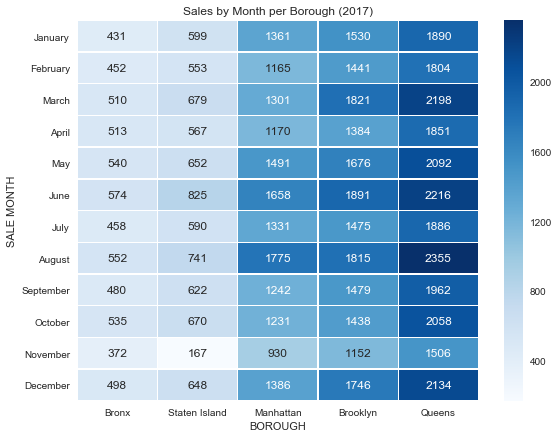

In [329]:
#Sales by Month Heatmap
sns.set()

monthly_sales = pd.read_csv('monthlysales.csv')
sales = monthly_sales.pivot("SALE MONTH", "BOROUGH", "COUNT")
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
borough = ['Bronx', 'Staten Island','Manhattan', 'Brooklyn', 'Queens']
sales = sales.reindex(months,borough)
#borough = sales.reindex(borough)

#Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9,7))
sns.heatmap(sales, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="Blues")

plt.title("Sales by Month per Borough (2017)")

plt.savefig("monthlysales.png")

plt.show()
                          
